# Analysis on Fast food Restaurants in Maryland



## Overview:

#### We selected the topic Fast Food Restaurants. It was interesting to find out that different age groups actually have different preference for fast food. The number of restaurants in Maryland have increased in different areas over the years. It is also interesting to find that the customers actually have their preferences with which fast food restaurant they would like to visit. The following are the goals we have accomplishedin the same order: <br />
1) Comparitive study of people who prefer different restaurants in 2017 and 2018 based on different age groups <br />
2) Predict the restaurant preference of people in 2019 using a regression model(ARIMA) <br />
3) Visualization of the locations of fast food restaurants across Maryland <br />
4) Visualize the difference in the number of restaurants before 2019 and in 2019. </br>

### Datasets:

####  The data sets used for this project are: 
<b>People who visited restaurants by Age(2017,2018) - (Company, AgeGroup, Year, Share of responders)</b> - This dataset includes the data for age groups 18-29,30-59, 60-79 that have visited fast food restaurants in the year 2017 and 2018. It includes the respondents in percentage for different fast food restaurants.

<b>Sales data of restaurants(2017,2018) - (RestaurantName, Sales(Billion usd)</b> - This dataset includes the total sales of some famous fast food restaurants.

<b>People who visited the restaurants in 2017 - (RestaurantName, No. of people(in %)</b> - This dataset includes the total number of people who visited fast food restaurants in 2017.

<b>Fast Food Restaurants in USA - (Restaurant Name, LocationDetails(lattitude,longitude,postal code))</b> - includes the addresses of vaious restaurants. This also includes 2 more datasets that have information about the Restaurants in 2018 and 2019 seperately.


In [114]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [31]:
dfsales = pd.read_csv("ding-chain-restaurants-in-the-us-in.csv")

In [3]:
df17 = pd.read_csv("t-restaurants-in-the-us-2017-by-age.csv")

In [4]:
df18 = pd.read_csv("t-restaurants-in-the-us-2018-by-age.csv")

In [10]:
dfvisited = pd.read_csv("visited-fast-food-restaurants-2017.csv")

In [11]:
dfrests = pd.read_csv("datafiniti_fast_food_restaurants.csv")

In [12]:
dfrests10 = pd.read_csv("datafiniti_fast_food_restaurants_jun19.csv")

In [13]:
dfrestaurant = pd.read_csv("fastfoodrestaurants.csv")

<b> Cleaning the data

In order to perform the comparative analysis , these datasets have been filtered first.

Delete unnecessary columns for example : ‘Country’ column has only a single value US, which is redundant.
The dataset includes data for other restaurants as well. Remove the data for other restaurants in both datasets 2017 as well as 2018
The age groups presented in this datasets are '18 - 29 years', '30 - 49 years', '50 - 64 years', although these were inconsistent across all the datasets having redundant spaces. Remove spaces and redundant characters. 

In [19]:
df18['Age'].unique()

array(['18 - 29 years', '30 - 49 years', '50 - 64 years', '18-29 years',
       '30-49 years', '50-64 years'], dtype=object)

In [20]:
df18['Age'] = df17['Age'].replace(['18 - 29 years', '30 - 49 years', '50 - 64 years'], ['18-29 years', '30-49 years', '50-64 years'])

In [21]:
df18['Age'].unique()

array(['18-29 years', '30-49 years', '50-64 years'], dtype=object)

In [22]:
df17['Age'].unique()

array(['18-29 years', '30-49 years', '50-64 years'], dtype=object)

In [24]:
df17['Age'] = df17['Age'].replace(['18 - 29 years', '30 - 49 years', '50 - 64 years'], ['18-29 years', '30-49 years', '50-64 years'])

In [25]:
df17['Age'].unique()

array(['18-29 years', '30-49 years', '50-64 years'], dtype=object)

In [34]:
df17=df17.drop(columns=['Country'])
df18=df18.drop(columns=['Country'])
df17.head(10)

,Company,Age,Share of respondents,Year
0,Burger King,18-29 years,78.34,2017
1,Burger King,30-49 years,82.89,2017
2,Burger King,50-64 years,85.43,2017
3,Dunkin' Donuts,18-29 years,57.73,2017
4,Dunkin' Donuts,30-49 years,49.72,2017
5,Dunkin' Donuts,50-64 years,46.29,2017
6,Arby's,18-29 years,65.98,2017
7,Arby's,30-49 years,68.90,2017
8,Arby's,50-64 years,71.92,2017
9,KFC,18-29 years,82.11,2017


In [150]:
dfrestaurant = dfrestaurant.drop(['websites', 'keys'], axis =1)

<h3><b>Visualize the data

In [26]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

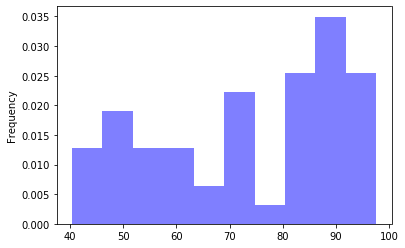

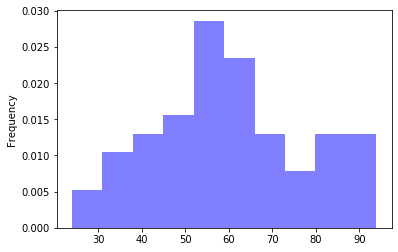

In [30]:
df17['Share of respondents'].plot.hist( 20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

df18['Share of respondents'].plot.hist(20,
         density=True,
         histtype='bar',
         facecolor='b',
         alpha=0.5)

plt.show()

The above graphs just displays the share of respondents in 2017 and 2018 for different age groups.

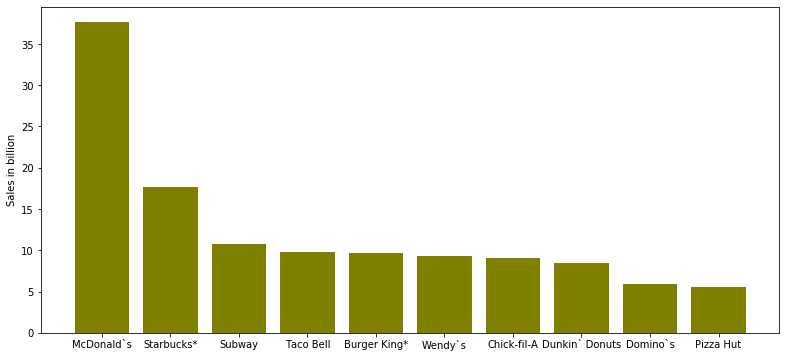

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(45, 6))
plt.subplot(131)
plt.bar(dfsales['Company'], dfsales['Sales in billion U.S. dollars'],facecolor='olive')
plt.ylabel('Sales in billion')
plt.show()

#### The above graphs displays the total sales of the various fast food restaurants. As we can observe McDonald's and Starbuck's seems to be the most popular restaurants.

In [35]:
matplotlib.style.use('ggplot')

In [37]:
df17.columns

Index(['Company', 'Age', 'Share of respondents', 'Year'], dtype='object')

In [38]:
s = df17['Age']

In [40]:
classmap = {}
for idx, name in enumerate(df17['Age'].unique()):
    classmap[name] = float(idx)
df17['Label'] = df17['Age'].apply(lambda x: classmap[x])

#### There were two choices we could this of. First was to take the average of the age range or remove the hiphen from between the ages. In both cases the values of the age range remain same and don't overrun other values.

In [41]:
df17['Age'] = df17['Age'].map(lambda x: x.lstrip('+-').rstrip('years'))

In [42]:
df17['Age'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [43]:
df17.dtypes

Company                  object
Age                      object
Share of respondents    float64
Year                      int64
Label                   float64
dtype: object

In [44]:
df17['Age'] = df17['Age'].apply(pd.to_numeric, errors='coerce')

In [45]:
df18['Age'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [47]:
df18['Age'] = df18['Age'].apply(pd.to_numeric, errors='coerce')

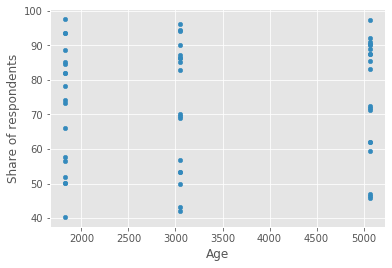

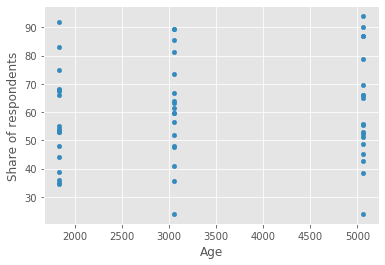

In [48]:
df17.plot.scatter(x = 'Age', y = 'Share of respondents')
df18.plot.scatter(x = 'Age', y = 'Share of respondents')

#### We can observe from the two graphs the difference of the preferrence of different age groups for fast food restaurants. The first line is for the age group 18-29, 30-49, 50-69. Though we can observe the difference of different age groups, this type of viusalization is not very clear to find the difference between the preference of different age groups for different restaurants.

In [70]:
df17 = pd.read_csv("t-restaurants-in-the-us-2017-by-age.csv")
df18 = pd.read_csv("t-restaurants-in-the-us-2018-by-age.csv")

In [81]:
df18['Age'].unique()

df18['Age'] = df18['Age'].replace(['18 - 29 years', '30 - 49 years', '50 - 64 years'], ['18-29 years', '30-49 years', '50-64 years'])
df18['Age'].unique()


df17['Age'].unique()
df17['Age'] = df17['Age'].replace(['18 - 29 years', '30 - 49 years', '50 - 64 years'], ['18-29 years', '30-49 years', '50-64 years'])
df17['Age'].unique()


df17=df17.drop(columns=['Country'])
df18=df18.drop(columns=['Country'])
df17.head(10)


,Company,Age,Share of respondents,Year
0,Burger King,18-29 years,78.34,2017
1,Burger King,30-49 years,82.89,2017
2,Burger King,50-64 years,85.43,2017
3,Dunkin' Donuts,18-29 years,57.73,2017
4,Dunkin' Donuts,30-49 years,49.72,2017
5,Dunkin' Donuts,50-64 years,46.29,2017
12,McDonald's,18-29 years,82.12,2017
13,McDonald's,30-49 years,89.99,2017
14,McDonald's,50-64 years,91.08,2017
15,Subway,18-29 years,93.73,2017


In [82]:
indexNames = df17[ df17['Company'] == 'KFC' ].index
 
# Delete these row indexes from dataFrame
df17.drop(indexNames , inplace=True)


In [83]:
indexNames = df18[ df18['Company'] == 'KFC' ].index
 
# Delete these row indexes from dataFrame
df18.drop(indexNames , inplace=True)

In [84]:
indexNames = df17[ df17['Company'] == 'Papa John\'s' ].index
 
# Delete these row indexes from dataFrame
df17.drop(indexNames , inplace=True)

In [85]:
indexNames = df18[ df18['Company'] == 'Papa John\'s' ].index
 
# Delete these row indexes from dataFrame
df18.drop(indexNames , inplace=True)

In [86]:
indexNames = df17[ df17['Company'] == 'Chipotle Mexican Grill' ].index
 
# Delete these row indexes from dataFrame
df17.drop(indexNames , inplace=True)

In [87]:
indexNames = df18[ df18['Company'] == 'Chipotle Mexican Grill'].index
 
# Delete these row indexes from dataFrame
df18.drop(indexNames , inplace=True)

In [88]:
indexNames = df17[ df17['Company'] == 'Little Caesars' ].index
 
# Delete these row indexes from dataFrame
df17.drop(indexNames , inplace=True)

indexNames = df18[ df18['Company'] == 'Little Caesars' ].index
 
# Delete these row indexes from dataFrame
df18.drop(indexNames , inplace=True)


indexNames = df17[ df17['Company'] == 'Jack in the Box' ].index
 
# Delete these row indexes from dataFrame
df17.drop(indexNames , inplace=True)

indexNames = df18[ df18['Company'] == 'Jack in the Box' ].index
 
# Delete these row indexes from dataFrame
df18.drop(indexNames , inplace=True)

indexNames = df17[ df17['Company'] == 'Panera Bread' ].index
 
# Delete these row indexes from dataFrame
df17.drop(indexNames , inplace=True)

indexNames = df18[ df18['Company'] == 'Panera Bread' ].index
 
# Delete these row indexes from dataFrame
df18.drop(indexNames , inplace=True)

indexNames = df17[ df17['Company'] == 'Arby\'s' ].index
 
# Delete these row indexes from dataFrame
df17.drop(indexNames , inplace=True)

indexNames = df18[ df18['Company'] == 'Arby\'s' ].index
 
# Delete these row indexes from dataFrame
df18.drop(indexNames , inplace=True)

In [89]:
df18.loc[df18['Age'] == '18-29 years']
df17.dtypes

Company                  object
Age                      object
Share of respondents    float64
Year                      int64
dtype: object

In [90]:
frames = [df17, df18]
dfmerged = pd.concat(frames)
dfmerged

,Company,Age,Share of respondents,Year
0,Burger King,18-29 years,78.34,2017
1,Burger King,30-49 years,82.89,2017
2,Burger King,50-64 years,85.43,2017
3,Dunkin' Donuts,18-29 years,57.73,2017
4,Dunkin' Donuts,30-49 years,49.72,2017
...,...,...,...,...
41,Starbucks,50-64 years,90.02,2018
45,Taco Bell,18-29 years,74.76,2018
46,Taco Bell,30-49 years,81.23,2018
47,Taco Bell,50-64 years,86.90,2018


In [91]:
dfmergedAge1 = dfmerged.loc[dfmerged['Age'] == '18-29 years']
dfmergedAge1

,Company,Age,Share of respondents,Year
0,Burger King,18-29 years,78.34,2017
3,Dunkin' Donuts,18-29 years,57.73,2017
12,McDonald's,18-29 years,82.12,2017
15,Subway,18-29 years,93.73,2017
18,Wendy's,18-29 years,88.64,2017
21,Pizza Hut,18-29 years,97.56,2017
24,Chick-fil-A,18-29 years,74.32,2017
36,Domino's,18-29 years,93.65,2017
39,Starbucks,18-29 years,85.19,2017
45,Taco Bell,18-29 years,84.74,2017


#### Then these datasets have been merged in a single dataset. Then we have compared the share of  all age groups with respect to year 2018 and 2017.
For age group 18-29<br/>
For age group 30-49 <br/>
For age group 50-64 <br/>
Legend : blue=2017, yellow = 2018<br/>

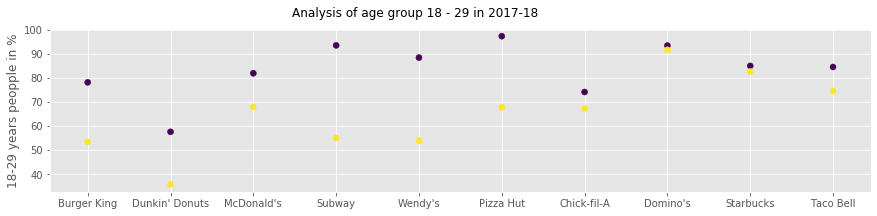

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 3))

plt.suptitle('Analysis of age group 18 - 29 in 2017-18')
plt.subplot(132)
plt.ylabel('18-29 years peopple in %')
plt.scatter(x=dfmergedAge1['Company'], y=dfmergedAge1['Share of respondents'],c=dfmergedAge1['Year'])
plt.show()

In [93]:
dfmergedAge2=dfmerged.loc[dfmerged['Age'] == '30-49 years']
dfmergedAge2

,Company,Age,Share of respondents,Year
1,Burger King,30-49 years,82.89,2017
4,Dunkin' Donuts,30-49 years,49.72,2017
13,McDonald's,30-49 years,89.99,2017
16,Subway,30-49 years,94.34,2017
19,Wendy's,30-49 years,87.26,2017
22,Pizza Hut,30-49 years,94.31,2017
25,Chick-fil-A,30-49 years,69.45,2017
37,Domino's,30-49 years,96.11,2017
40,Starbucks,30-49 years,86.28,2017
46,Taco Bell,30-49 years,85.16,2017


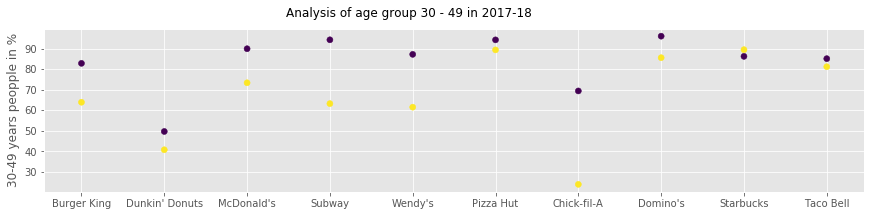

In [94]:
import matplotlib.pyplot as plt


plt.figure(figsize=(50, 3))
plt.suptitle('Analysis of age group 30 - 49 in 2017-18')
plt.subplot(132)
plt.ylabel('30-49 years peopple in %')

plt.scatter(x=dfmergedAge2['Company'], y=dfmergedAge2['Share of respondents'],c=dfmergedAge2['Year'])
plt.show()

In [95]:
dfmergedAge3=dfmerged.loc[dfmerged['Age'] == '50-64 years']
dfmergedAge3

,Company,Age,Share of respondents,Year
2,Burger King,50-64 years,85.43,2017
5,Dunkin' Donuts,50-64 years,46.29,2017
14,McDonald's,50-64 years,91.08,2017
17,Subway,50-64 years,90.12,2017
20,Wendy's,50-64 years,83.29,2017
23,Pizza Hut,50-64 years,92.12,2017
26,Chick-fil-A,50-64 years,71.26,2017
38,Domino's,50-64 years,97.39,2017
41,Starbucks,50-64 years,89.01,2017
47,Taco Bell,50-64 years,87.37,2017


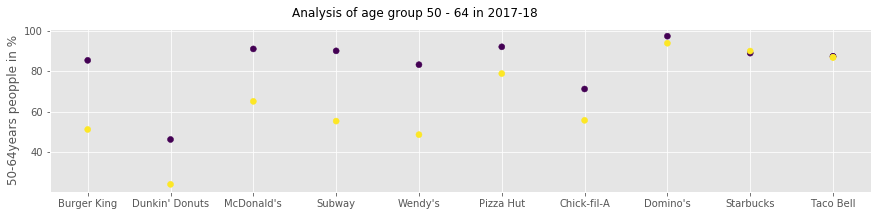

In [96]:
import matplotlib.pyplot as plt


plt.figure(figsize=(50, 3))
plt.suptitle('Analysis of age group 50 - 64 in 2017-18')
plt.subplot(132)
plt.ylabel('50-64years peopple in %')
plt.scatter(x=dfmergedAge3['Company'], y=dfmergedAge3['Share of respondents'],c=dfmergedAge3['Year'])
plt.show()

#### From above 3 graphs, we can conclusively say that percentage of people who visit fast food restaurants have been decreased in year 2018 across all age groups except starbucks and dominos . Surprisingly, the number has been consistent among all age groups for starbucks.
#### This might show that people have been leaning towards a more healthy life in 2018.


In [97]:
df17Age1=df17.loc[df17['Age'] == '18-29 years']
df18Age1=df17.loc[df17['Age'] == '18-29 years']

<b>Seaborn graph</b> A graph below shows the visualization of share of respondents across all age groups for all fast food restaurants in 2017 and 2018. 

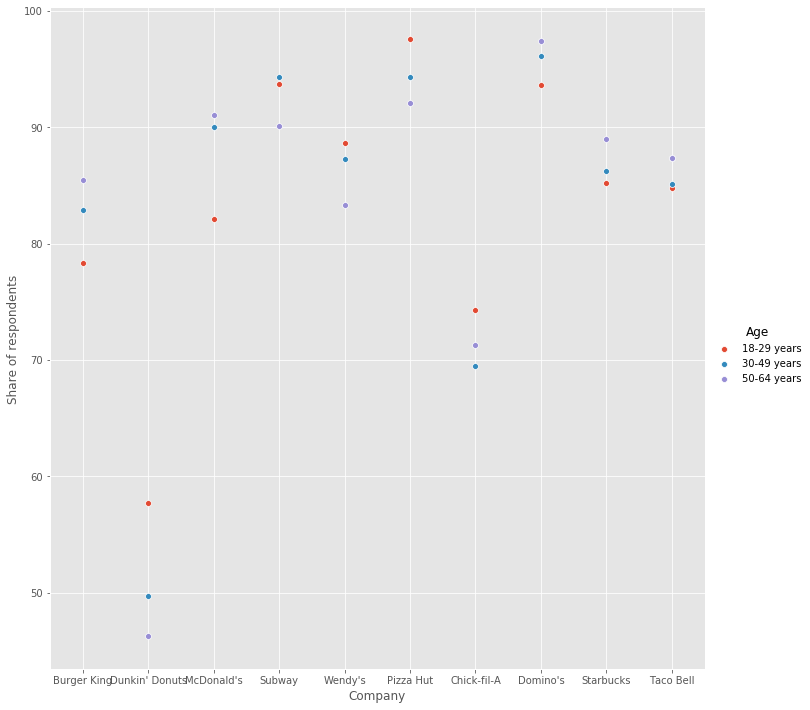

In [101]:
import seaborn as sns
sns.pairplot(x_vars=["Company"], y_vars=["Share of respondents"], data=df17, hue="Age", size=10)

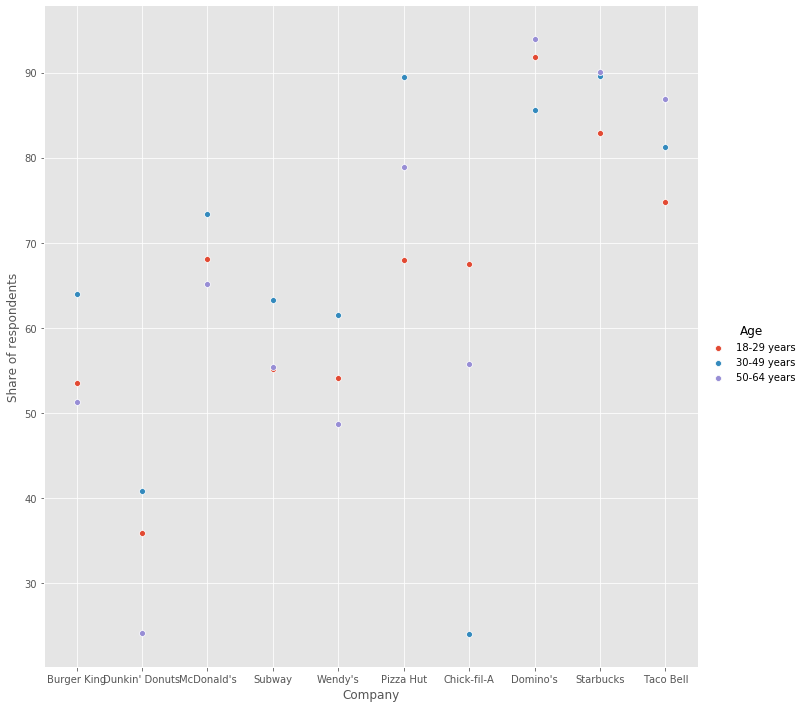

In [99]:
import seaborn as sns
sns.pairplot(x_vars=["Company"], y_vars=["Share of respondents"], data=df18, hue="Age", size=10)

<b>Observation</b>One of the interesting thing to note here is that groups 50-64 years prefer Burger King, McDonald's, Domino's, Starbucks and Taco Bell the highest compared to other groups in 2017. But, in 2018, though Domino's, starbucks and Taco Bell remained popular among this age group, Burger King and Mc Donald's seem to have lost the catch among this age group.

Similary, the younger generation seemed to have liked pizza hut and Chik-fil-A a lot in 2017 but in 2018 they justt did not like it that much.

We can also observe that group 30-49 years of age who did not prefer eating in fast food restaurants in 2017 have started enjoying it in 2018 as compared to other groups.

<b> Prediction Analysis</b> In the following steps we would like to try to build a prediction for the preference of customers in different age groups in the coming year.

We decided to use the Algorithm ARIMA for the prediction analysis. 
Analysing our data led to look for a model which will be more efficient in predicting the time series. The Autoregressive Integrated Moving Average Model, or ARIMA for short is a standard statistical model for time series which we can use to train and forecast the future times.The model uses observations and applies weight to every observed term and these weights will be used to forecast the time points. Arima uses autoregression for estimation.

A nonseasonal ARIMA model is classified as an "ARIMA(p,d,q)" model, where:
p is the number of autoregressive terms,
d is Differencing order
q is the Moving average feature of the model. 
We used ARIMA(1,0,0) which is also called as  first-order autoregressive model.


In [107]:
dfKing = df17[df17['Company'] == 'Burger King']
dfKing

,Company,Age,Share of respondents,Year
0,Burger King,18-29 years,78.34,2017
1,Burger King,30-49 years,82.89,2017
2,Burger King,50-64 years,85.43,2017


In [108]:
dfKing18 = df18[df18['Company'] == 'Burger King']

In [109]:
dfKing18

,Company,Age,Share of respondents,Year
0,Burger King,18-29 years,53.53,2018
1,Burger King,30-49 years,63.95,2018
2,Burger King,50-64 years,51.24,2018


In [111]:
import numpy as np
dfKingpredict = pd.concat([dfKing , dfKing18])

In [112]:
dfKingpredict

,Company,Age,Share of respondents,Year
0,Burger King,18-29 years,78.34,2017
1,Burger King,30-49 years,82.89,2017
2,Burger King,50-64 years,85.43,2017
0,Burger King,18-29 years,53.53,2018
1,Burger King,30-49 years,63.95,2018
2,Burger King,50-64 years,51.24,2018


                               ARMA Model Results                               
Dep. Variable:     Share of respondents   No. Observations:                    6
Model:                       ARMA(1, 0)   Log Likelihood                 -24.005
Method:                         css-mle   S.D. of innovations             13.119
Date:                  Wed, 18 Dec 2019   AIC                             54.010
Time:                          20:15:41   BIC                             53.385
Sample:                               0   HQIC                            51.509
                                                                                
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         68.6783      7.214      9.520      0.001      54.540      82.817
ar.L1.Share of respondents     0.2986      0.429      0.696      0.

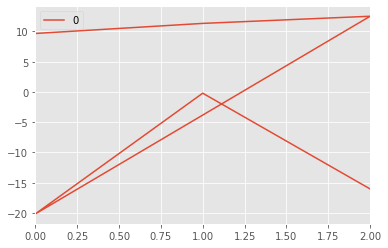

               0
count   6.000000
mean   -0.480792
std    14.419674
min   -20.149935
25%   -12.071255
50%     4.728158
75%    10.910649
max    12.508446


In [115]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
from matplotlib import pyplot
#fit model
model = ARIMA(dfKingpredict['Share of respondents'], order=(1,0,0))
model_fit = model.fit(dis=0)
print(model_fit.summary())
#plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
print(residuals.describe())

In [116]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

In [118]:
dfKingpredict_1829 = dfKingpredict.iloc[[0,3]]

In [119]:
dfKingpredict_1829 = dfKingpredict_1829.drop(['Age'], axis=1)

In [120]:
dfKingpredict_1829

,Company,Share of respondents,Year
0,Burger King,78.34,2017
0,Burger King,53.53,2018


In [121]:
from statsmodels.tsa.arima_model import ARIMA

def StartARIMAForecasting(Actual, P, D, Q):
    model = ARIMA(Actual, order=(P, D, Q))
    model_fit = model.fit(disp=0)
    prediction = model_fit.forecast()[0]
    return prediction

data = [1,1.5,2,4]

predicted = StartARIMAForecasting(data, 1,1,0)

print('Predicted=%f' % (predicted))

Predicted=4.542679


In [123]:
list(dfKingpredict_1829['Share of respondents'])

[78.34, 53.53]

In [124]:
decomposition = seasonal_decompose(dfKingpredict_1829) 
model = ARIMA(dfKingpredict, order=(2,1,2))
results = model.fit(disp=-1)
plt.plot(df_log_shift)
plt.plot(results.fittedvalues, color='red')

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

<b>NEGATIVE RESULT(FAILED ATTEMPT):</b>This attempt failed. There should be atleast 4 years data for this ARIMA algorithm which is a time based prediction to work. We tried finding the data online for 2016 and 2015 and the previous years but there was no dataset that could match up with what we wanted.

We tried some other algorithms and different ways of doing the prediction such as consodering the share of respondents and predicting the total customers a company can expect. But, due to the lack of data, the prediction models did not work properly.